In [3]:
from pandas_datareader import data, wb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import plotly
import cufflinks as cf
%matplotlib inline

cf.go_offline()
sns.set_style('whitegrid')

In [4]:
start_date = datetime.datetime(2006, 1, 1)
end_date = datetime.datetime(2016, 1, 1)

# gain data form internet source
# Bank of America
# BAC = data.DataReader('BAC', 'yahoo', start_date, end_date)
# CitiGroup
# C = data.DataReader('C', 'yahoo', start_date, end_date)
# Goldman Sachs
# GS = data.DataReader('GS', 'yahoo', start_date, end_date)
# JPMorgan Chase
# JPM = data.DataReader('JPM', 'yahoo', start_date, end_date)
# Morgan Stanley
# MS = data.DataReader('MS', 'yahoo', start_date, end_date)
# Wells Fargo
# WFC = data.DataReader('WFC', 'yahoo', start_date, end_date)
# bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

# gain data from file
bank_stocks = pd.read_pickle('../bank_data/input/all_banks')

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
print(bank_stocks.head())

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.7

In [5]:
# max Close price for each bank's stock throughout the time period

# base solution
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

# advanced one
print(bank_stocks.xs(key='Close', axis=1, level='Stock Info').max())


BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52
Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64


            BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000 

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns] 

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns] 

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.0

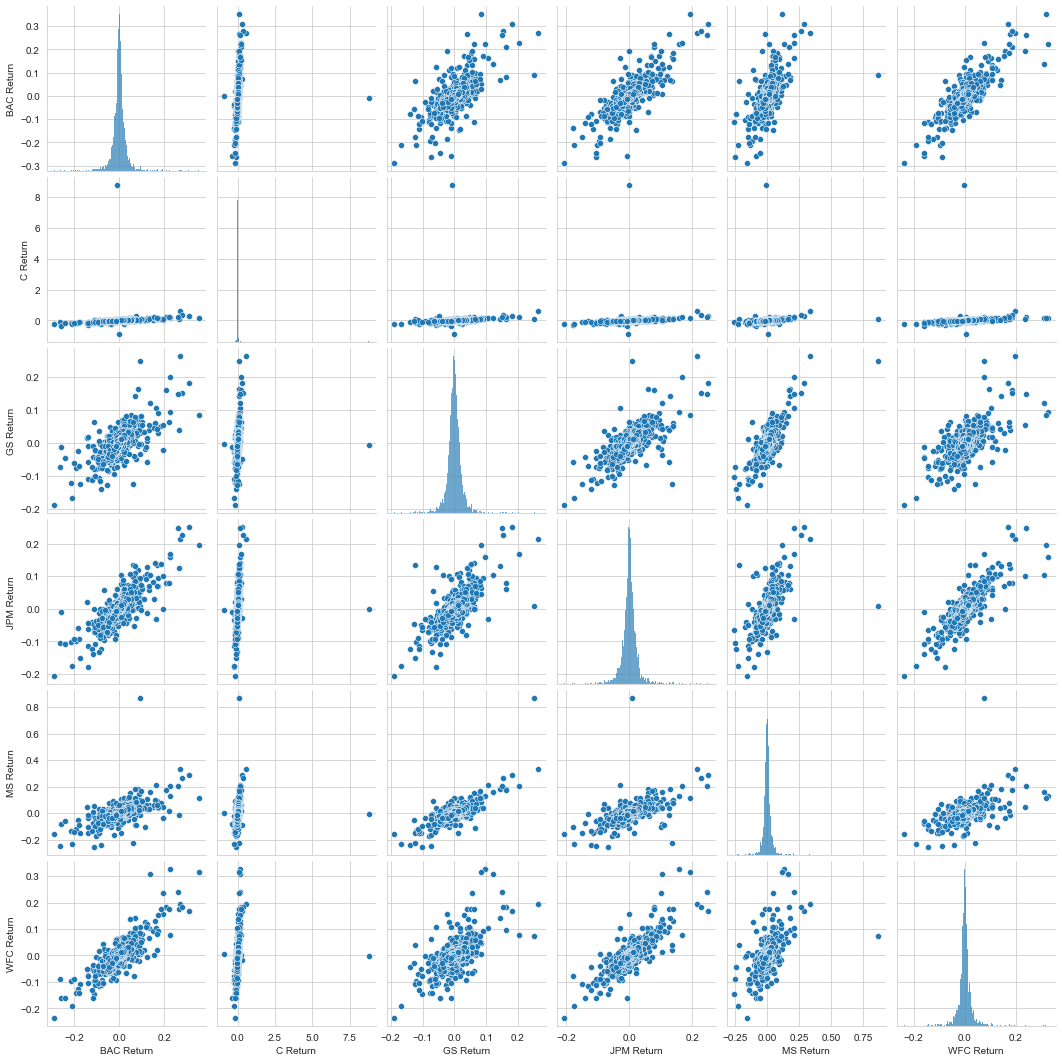

In [6]:
# returns for each bank's stock, create empry Data Frame,
# create loop that goes and for each Banckn Stock Ticker
# and create return column and sets it as a column in the returns Data Frame
returns = pd.DataFrame()

for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

print(returns.head(), '\n')
sns.pairplot(returns[1:])
plt.show()

# best and worst single day returns
print(returns.idxmin(), '\n')
print(returns.idxmax(), '\n')
print(returns.std(), '\n')
print(returns.loc['2015-01-01':'2015-12-31'].std(), '\n')

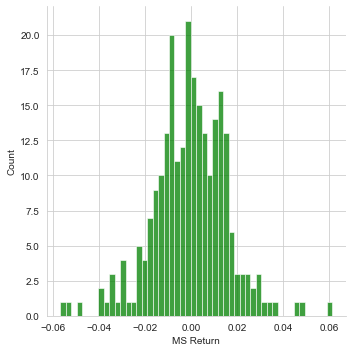

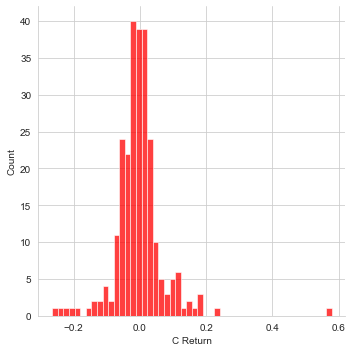

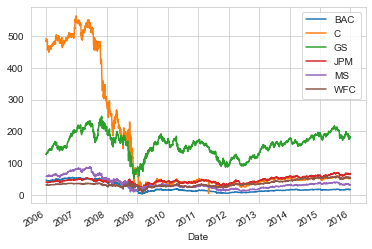

<Figure size 864x288 with 0 Axes>

In [7]:
# displot of returns for Morgan Stanley & CitiGroup
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50)
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)
plt.show()

# line plot showing Close price for each bank for the entire index of time
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick)
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()
plt.show()

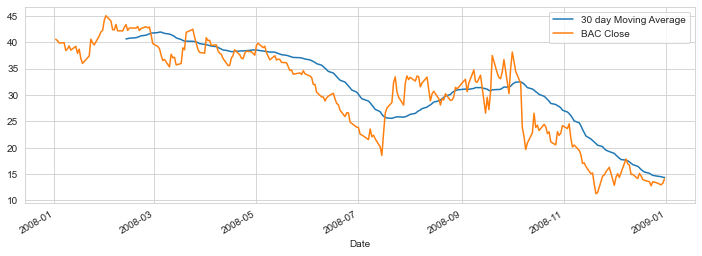

In [8]:
#plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Moving Average')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()
plt.show()

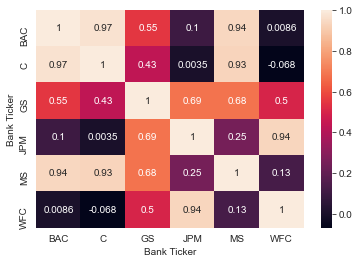

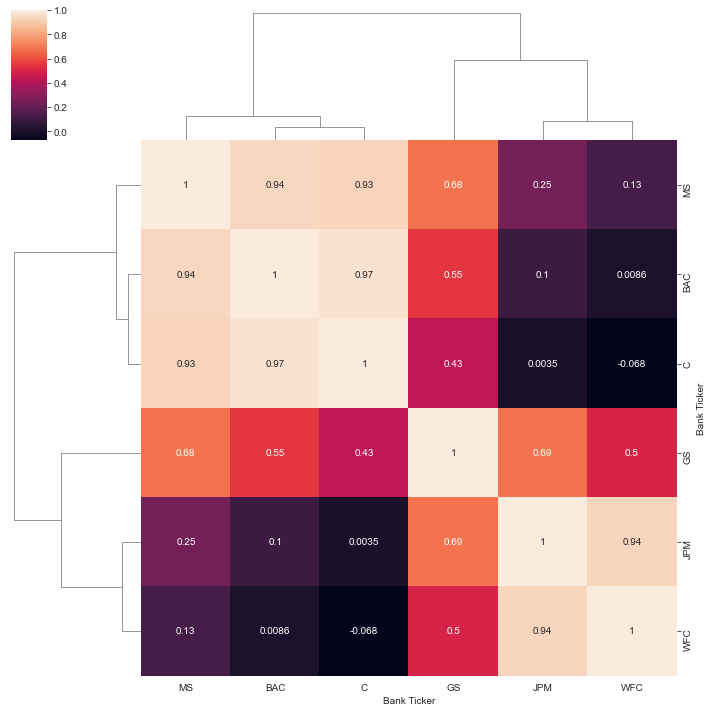

In [9]:
# clustermap of the correlation between the stocks Close Price
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)
plt.show()

In [12]:
#candle plot of BAC stock
bac15 = bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

In [15]:
#SImple Moving Averages plot of MS
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma')
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')